<a href="https://colab.research.google.com/github/Tinko55/UUZOP/blob/main/Malignant_and_Benign_Breast_Cancer_Classification_using_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms**

Tin Pavletić,
0036535313

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from scipy.stats import shapiro
from matplotlib.colors import ListedColormap

# **1. Predstavljanje podataka**

Učitavanje podataka

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataSet = pd.read_csv('/content/drive/MyDrive/data.csv')

Prikaz prvih 5 redova dataset-a

In [ ]:
dataSet.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Opis atributa dataset-a

In [ ]:
dataSet.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# 2. Pregled jedinstvenih vrijednosti

In [ ]:
dataSet.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

Vidimo kako atribut id toliko jedinstvenih vrijednosti koliko ima redaka u našem datasetu pa zaključujemo da se radi o monotono rastućem atributu

# 3. Transformiranje nenumeričkih atributa

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

iz prikaza informacija o dataset-u vidimo da radimo većinom s numeričkim podatcima osim u slučaju atributa **diagnosis** (vrijednosti M = malignant, B = benign) kojeg možemo transformirati u numerički atribut upotrebom labelEncodera

In [ ]:
le = LabelEncoder()
le.fit(dataSet.loc[:, 'diagnosis'])

dataSet.loc[:,'diagnosis'] = le.transform(dataSet.loc[:, 'diagnosis'])


<ipython-input-10-17a2cedb2a77>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataSet.loc[:,'diagnosis'] = le.transform(dataSet.loc[:, 'diagnosis'])


In [ ]:
dataSet.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 4. Prikaz nedostajućih vrijednosti

In [ ]:
dataSet.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Pozivanjem funkcije možemo vidjeti da dataset nema nedostajućih podataka te nije potrebno raditi ikakve operacije za nadopunjavanje dataset-a

# 5. Stršeće vrijednosti

In [ ]:
dataSet.describe()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Na prvi pogled postoji nekoliko atributa koji bi potencijalno mogli sadržavati stršeće podatke, no potrebno je vizualizirati podatke kako bih utvrdili radi li se zaista o stršećim podacima


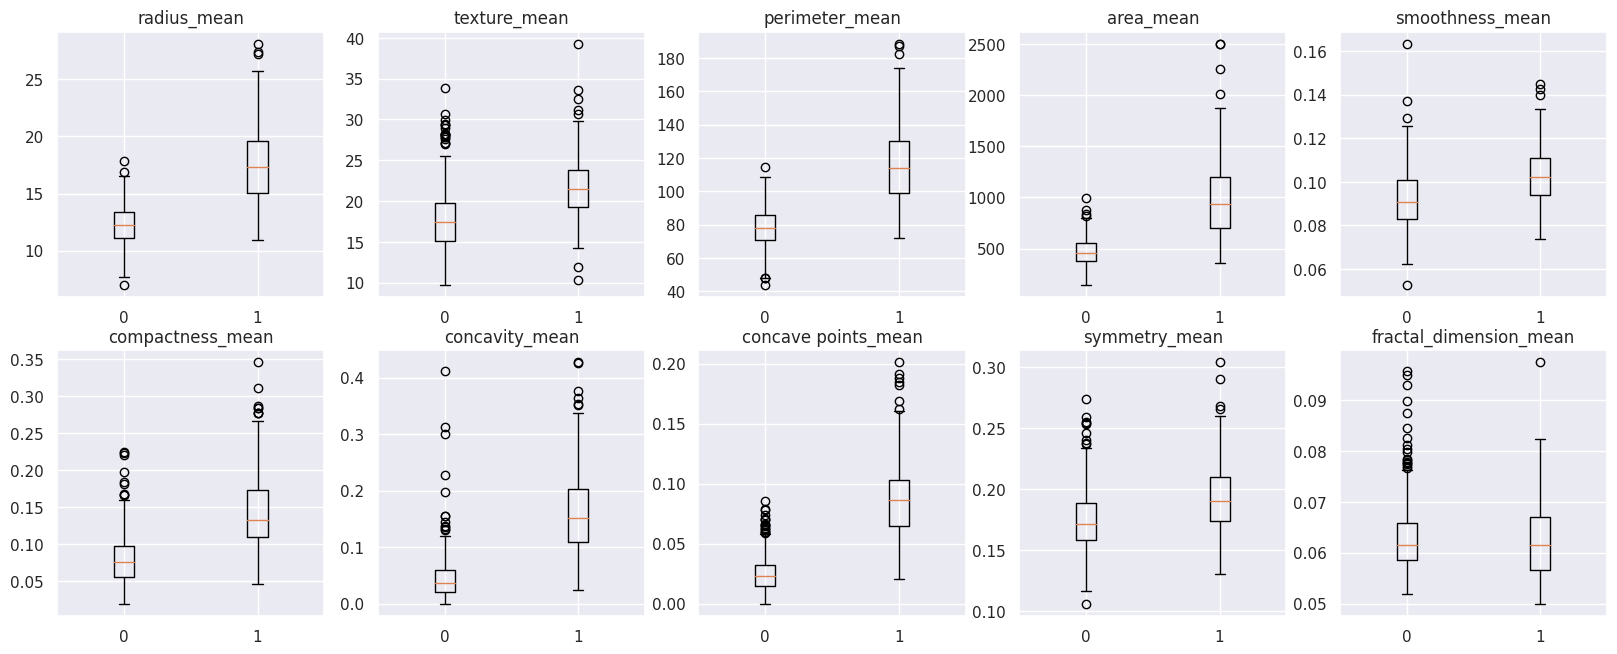

In [ ]:
dataSetB = dataSet[dataSet['diagnosis'] == 0]
dataSetM = dataSet[dataSet['diagnosis'] == 1]


meanColumnsB = dataSetB.iloc[:, 1:11]
meanColumnsM = dataSetM.iloc[:,1:11]

i=1
plt.figure(figsize=(20,20))
for (columnNameB, columnValueB), (columnNameM, columnValueM) in zip(meanColumnsB.items(), meanColumnsM.items()):
    plt.subplot(5,5, i)
    plt.boxplot(columnValueB, positions=[0])
    plt.boxplot(columnValueM, positions = [1])
    plt.title(columnNameB)

    i+=1

plt.show()


Uvidom u kvadrataste grafove svih 10 atributa vidimo da se zaista radi o stršećim vrijednostima, no neću ih ukloniti jer stršeće vrijednosti mogu nositi važne podatke za klasifikaciju

# **6. Vizualizacija podataka**

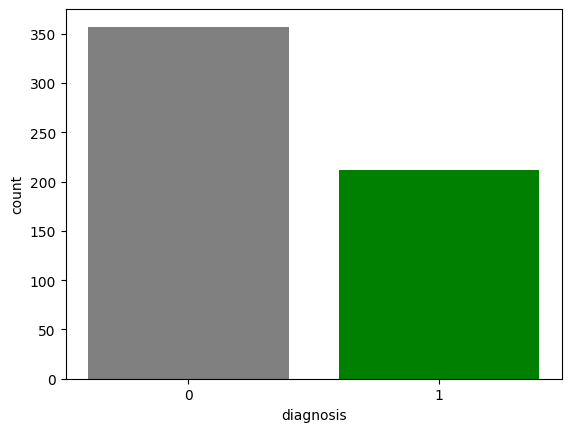

benign = 357
malignant = 212


In [ ]:
test = dataSet['diagnosis'].value_counts()
ben = test.values[0]
mal = test.values[1]
plt.bar(test.index[0], test.values[0], color='grey' )
plt.bar(test.index[1], test.values[1], color='green' )
plt.ylabel('count')
plt.xlabel('diagnosis')
plt.xticks([0, 1])
plt.show()
print('''benign = {0}
malignant = {1}'''.format(ben, mal))

Možemo vidjeti da u datasetu imamo 357 primjera benignog i 212 primjera malignog raka dojke

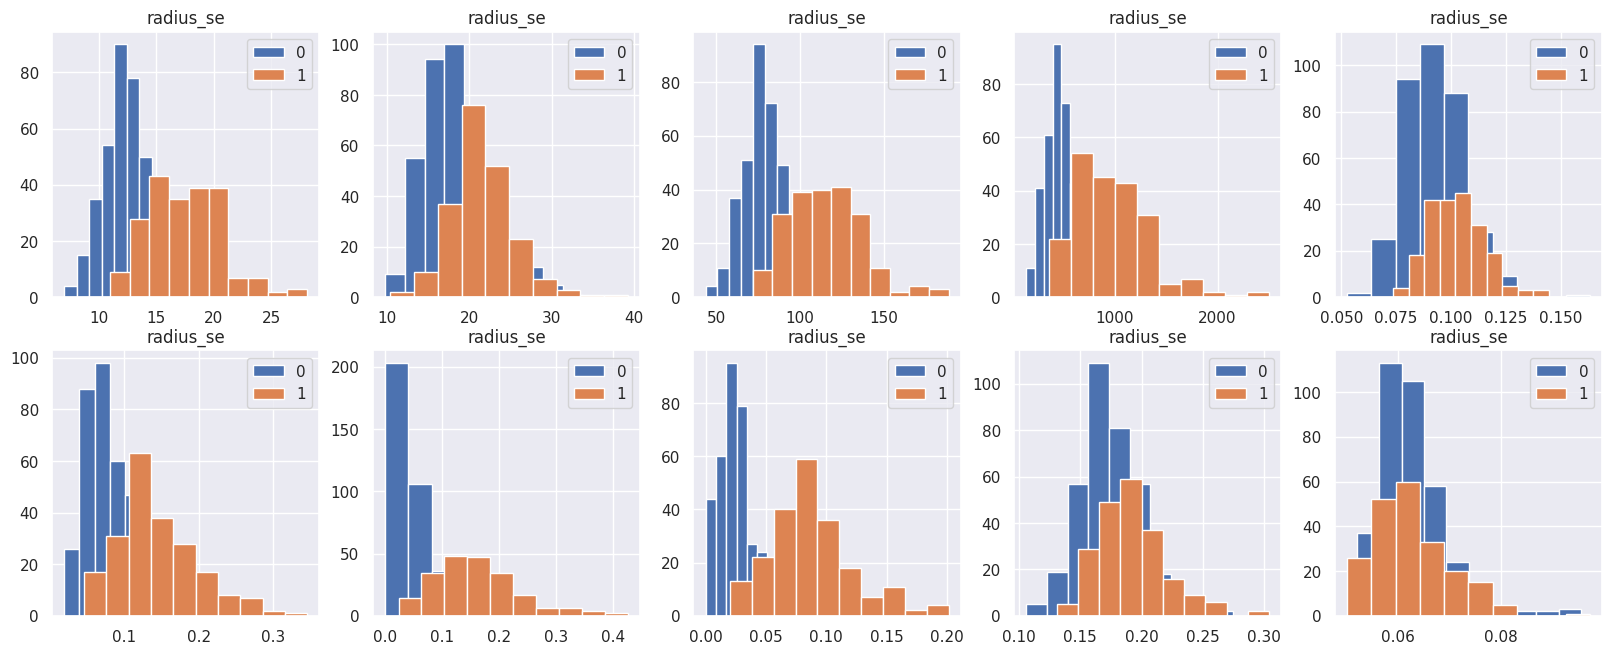

In [ ]:


i=1
plt.figure(figsize=(20,20))
for (columnNameB, columnValueB), (columnNameM, columnValueM) in zip(meanColumnsB.items(), meanColumnsM.items()):
    plt.subplot(5,5, i)
    plt.hist(columnValueB)
    plt.hist(columnValueM)
    plt.legend(labels=['0','1'])
    plt.title(columnName)

    i+=1

plt.show()

Uvidom u histograme atributa možemo vidjeti da ne radimo s potpuno normalno distribuiranim podacima već s pretežno lijevo nakrivljenim podacima

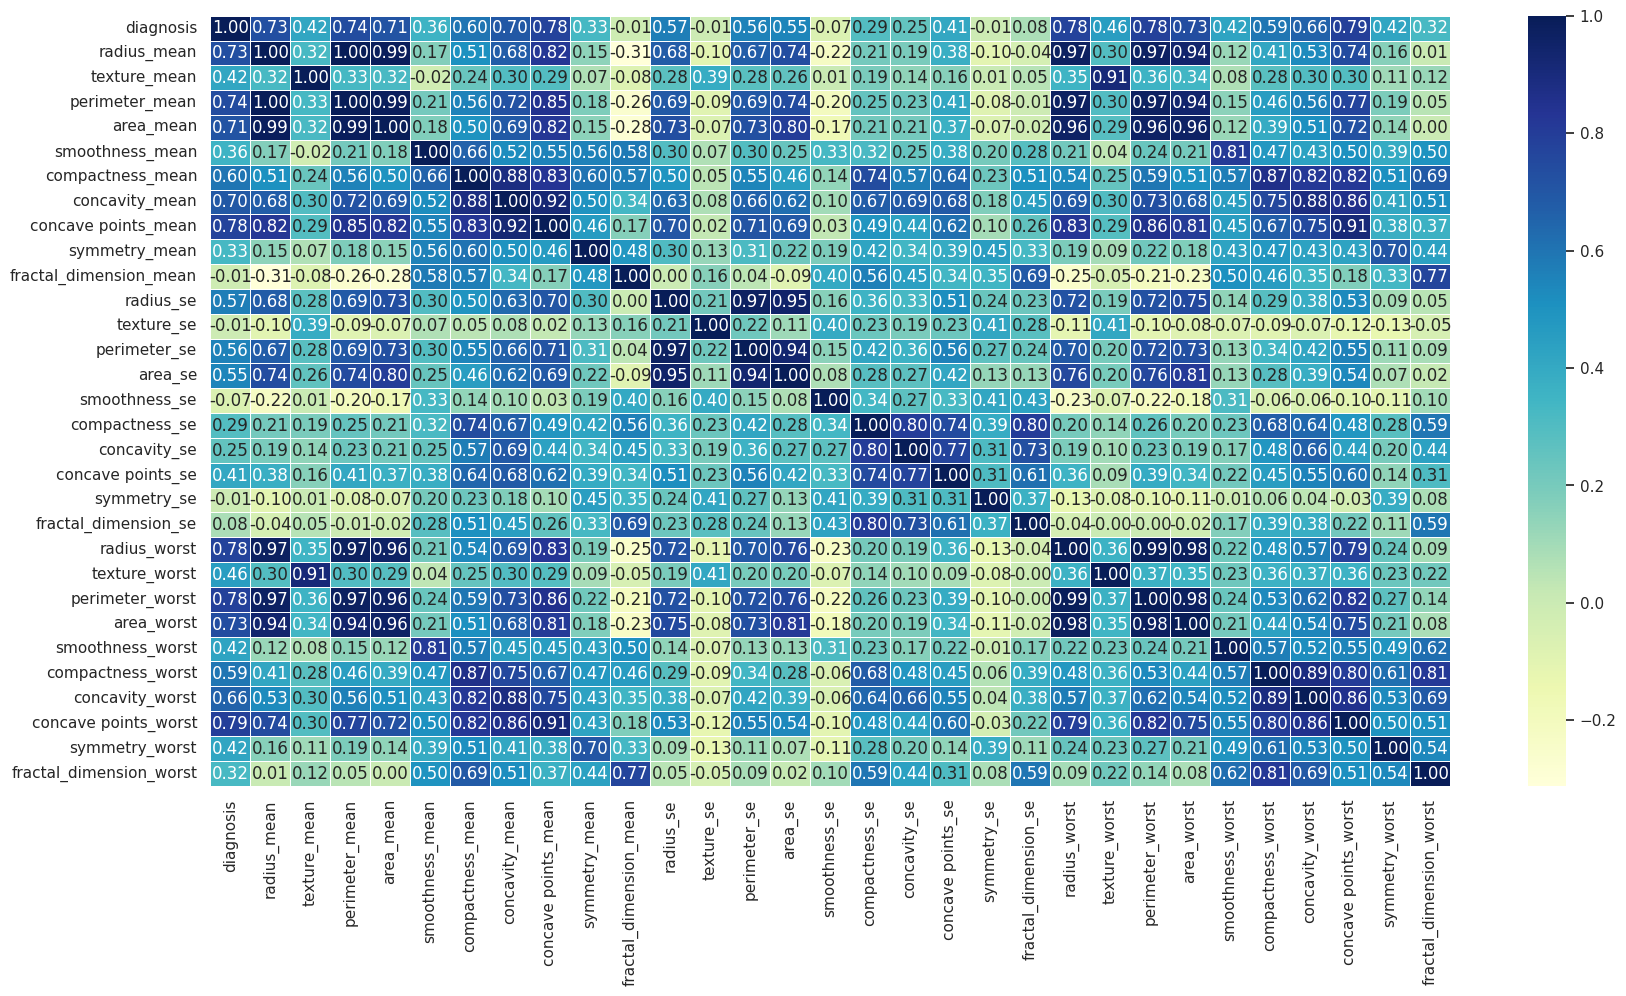

In [ ]:
dataSet.drop(('id'), axis=1, inplace=True)
dataSet.drop(('Unnamed: 32'), axis=1, inplace=True)
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(dataSet.corr(), annot=True,fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

Kod nekoliko atributa primjećuje se jaka korelacija te ćemo odnos tih atributa bolje prikazati na raspršenom grafu. Treba dodati da su atributi "id" i "Unnamed:32" uklonjen zbog preglednosti

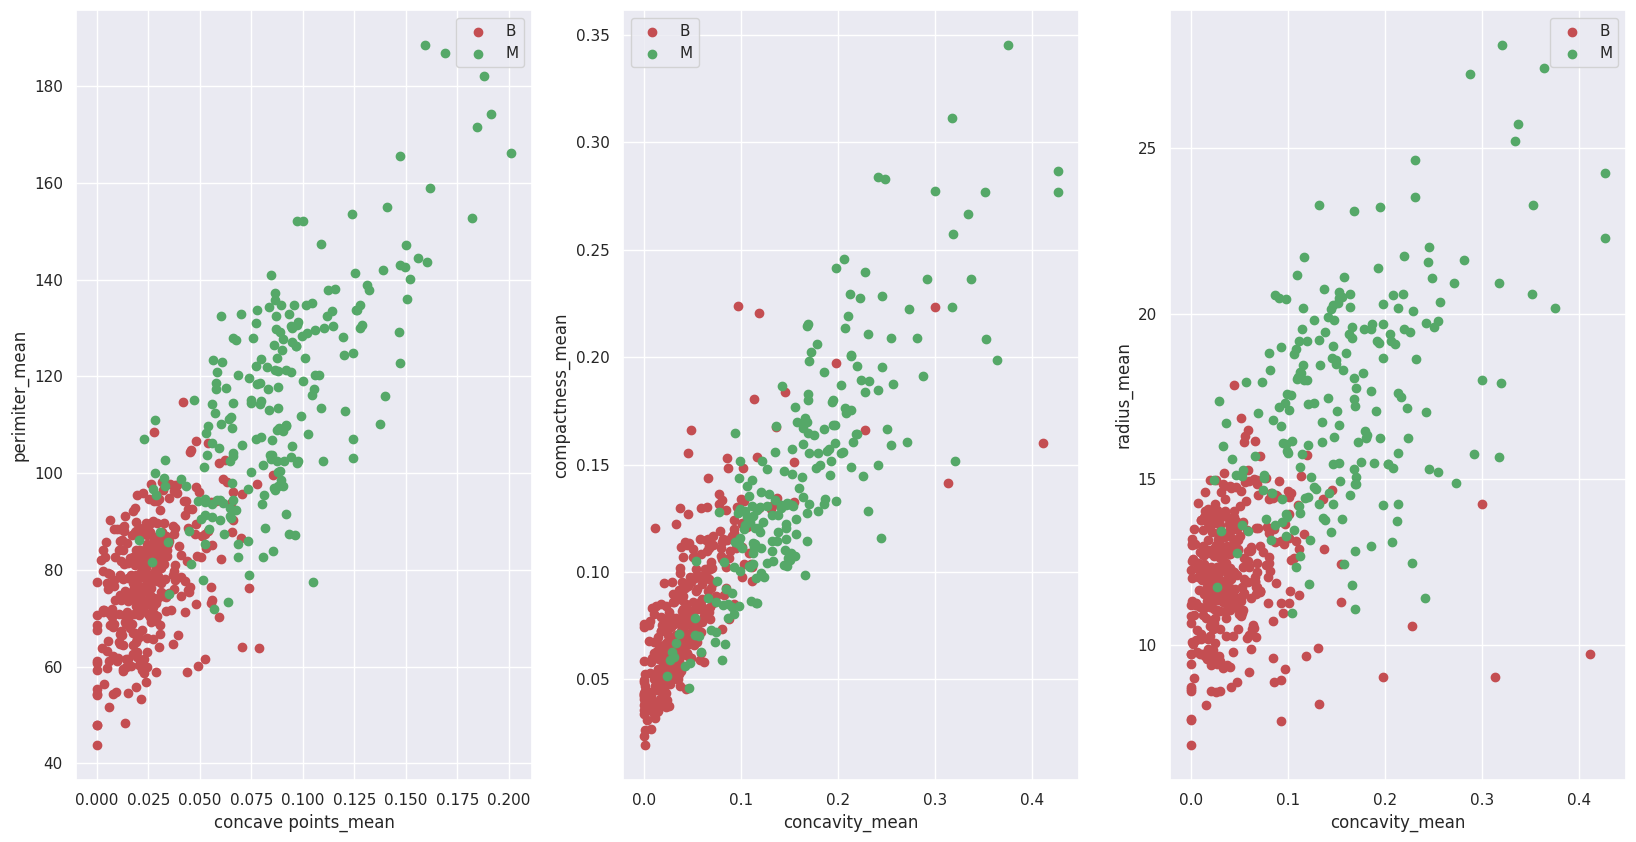

In [ ]:


dataSetB = dataSet[dataSet['diagnosis'] == 0]
dataSetM = dataSet[dataSet['diagnosis']  == 1]
plt.subplot(1,3, 1)
plt.scatter(dataSetB['concave points_mean'], dataSetB['perimeter_mean'], c='r',  label = 'B')

plt.scatter(dataSetM['concave points_mean'], dataSetM['perimeter_mean'], c='g',  label = 'M')
plt.xlabel('concave points_mean')
plt.ylabel('perimiter_mean')
plt.legend(loc='best')

plt.subplot(1, 3, 2)
plt.scatter(dataSetB['concavity_mean'], dataSetB['compactness_mean'], c='r',  label = 'B')

plt.scatter(dataSetM['concavity_mean'], dataSetM['compactness_mean'], c='g',  label = 'M')
plt.xlabel('concavity_mean')
plt.ylabel('compactness_mean')
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.scatter(dataSetB['concavity_mean'], dataSetB['radius_mean'], c='r',  label = 'B')

plt.scatter(dataSetM['concavity_mean'], dataSetM['radius_mean'], c='g',  label = 'M')
plt.xlabel('concavity_mean')
plt.ylabel('radius_mean')
plt.legend(loc='best')

plt.show()

U većini slučajeva vidimo da ekstremne vrijednosti upravo ukazuju na zloćudnost tumora

# **7. Reprodukcija rezultata istraživanja**

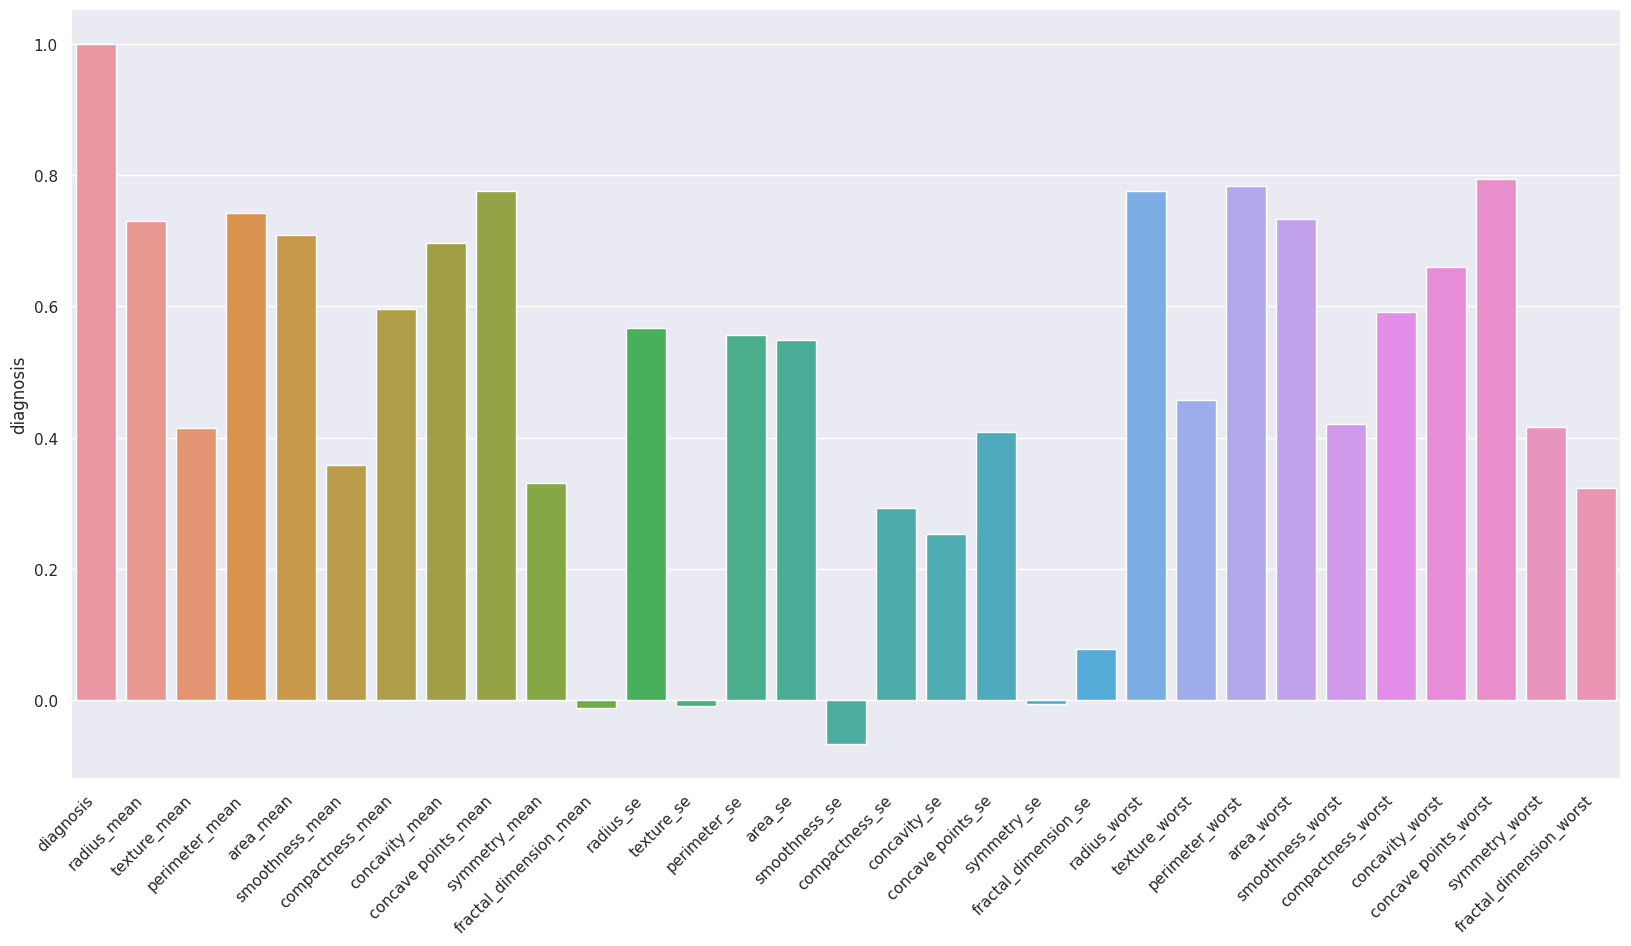

In [ ]:
correlation_matrix = dataSet.corr()

snsBarplot= sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0])


snsBarplot.set_xticklabels(snsBarplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Značajke slabo korelirane s dijagnozom možemo ukloniti zbog malenog utjecaja na klasifikaciju te kako bih naši klasifikatori bolje funkcionirali. Iz skupa podataka uklonit će se značajke "fractal_dimension_mean", "texture_se" te "symmetry_se".

In [ ]:
df = dataSet.drop(["fractal_dimension_mean", "texture_se", "symmetry_se"], axis=1)



# 8. Podjela skupa podataka na train i test skupove

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
labels = df['diagnosis'].values

features = df.drop(('diagnosis'), axis=1)


features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, train_size=0.75, random_state=55)

# 9. Logistička regresija

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


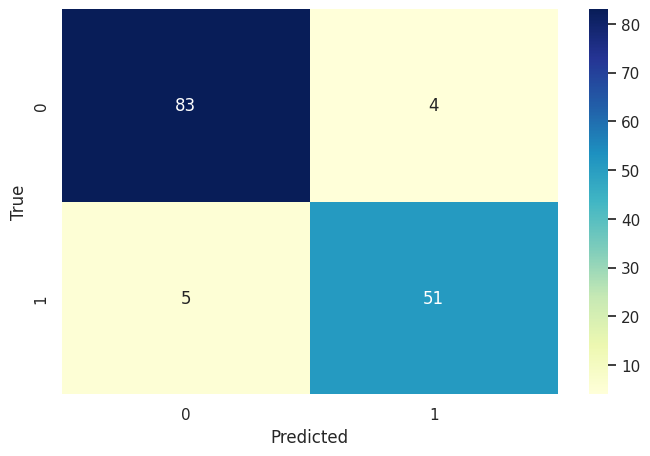

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        87
           1       0.93      0.91      0.92        56

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Train accuracy score = 0.95
Test accuracy score = 0.94
Precision score = 0.93
Recall score = 0.91
F1 score = 0.92


In [ ]:
modelLr = LogisticRegression()

modelLr.fit(features_train, labels_train)

predictLrTrain = modelLr.predict(features_train)
predictLrTest = modelLr.predict(features_test)



confusion_matLr = confusion_matrix(labels_test, predictLrTest)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matLr, annot=True,cmap="YlGnBu",
            xticklabels=np.unique(labels_test ),
            yticklabels=np.unique(labels_test ))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(labels_test, predictLrTest))
print('Train accuracy score = {0}'.format(round(accuracy_score(labels_train, predictLrTrain),2)))
print('Test accuracy score = {0}'.format(round(accuracy_score(labels_test, predictLrTest),2)))
print('Precision score = {0}'.format(round(precision_score(labels_test, predictLrTest),2)))
print('Recall score = {0}'.format(round(recall_score(labels_test, predictLrTest),2)))
print('F1 score = {0}'.format(round(f1_score(labels_test, predictLrTest),2)))

# 10. SVM

In [ ]:
from sklearn.svm import SVC

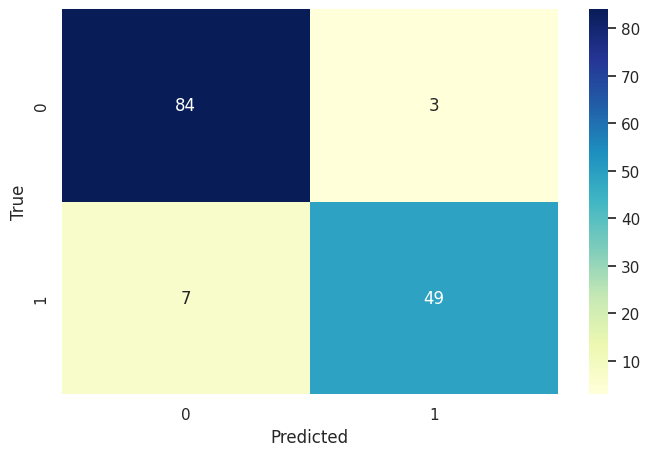

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        87
           1       0.93      0.91      0.92        56

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Train accuracy score = 0.92
Test accuracy score = 0.93
Precision score = 0.94
Recall score = 0.88
F1 score = 0.91


In [ ]:
model_svm = SVC()

model_svm.fit(features_train, labels_train)


predictSvmTrain = model_svm.predict(features_train)
predictSvmTest = model_svm.predict(features_test)

confusion_matSvm = confusion_matrix(labels_test, predictSvmTest)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matSvm, annot=True,cmap="YlGnBu",
            xticklabels=np.unique(labels_test ),
            yticklabels=np.unique(labels_test ))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(labels_test, predictLrTest))
print('Train accuracy score = {0}'.format(round(accuracy_score(labels_train, predictSvmTrain),2)))
print('Test accuracy score = {0}'.format(round(accuracy_score(labels_test, predictSvmTest),2)))
print('Precision score = {0}'.format(round(precision_score(labels_test, predictSvmTest),2)))
print('Recall score = {0}'.format(round(recall_score(labels_test, predictSvmTest),2)))
print('F1 score = {0}'.format(round(f1_score(labels_test, predictSvmTest),2)))

# 11. Slučajna stabla

In [ ]:
from sklearn.ensemble import RandomForestClassifier

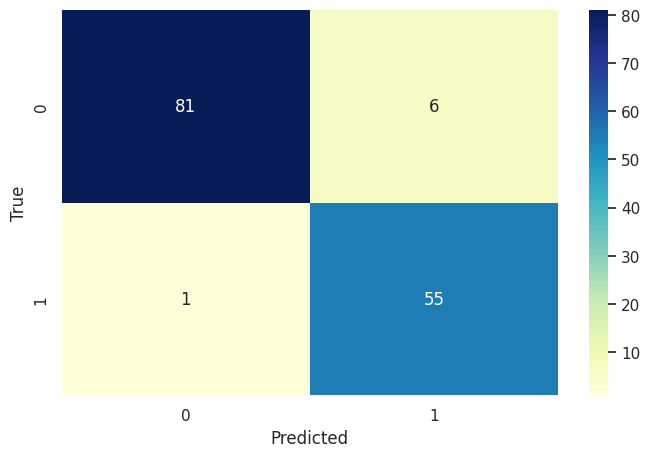

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        87
           1       0.90      0.98      0.94        56

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

Train accuracy score = 1.0
Test accuracy score = 0.95
Precision score = 0.9
Recall score = 0.98
F1 score = 0.94


In [ ]:
rfClf = RandomForestClassifier()

rfClf.fit(features_train, labels_train)

predictRfTrain = rfClf.predict(features_train)
predictRfTest = rfClf.predict(features_test)

confusion_matRf = confusion_matrix(labels_test, predictRfTest)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matRf, annot=True,cmap="YlGnBu",
            xticklabels=np.unique(labels_test ),
            yticklabels=np.unique(labels_test ))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(labels_test, predictRfTest))
print('Train accuracy score = {0}'.format(round(accuracy_score(labels_train, predictRfTrain),2)))
print('Test accuracy score = {0}'.format(round(accuracy_score(labels_test, predictRfTest),2)))
print('Precision score = {0}'.format(round(precision_score(labels_test, predictRfTest),2)))
print('Recall score = {0}'.format(round(recall_score(labels_test, predictRfTest),2)))
print('F1 score = {0}'.format(round(f1_score(labels_test, predictRfTest),2)))

# 12. Naivan bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

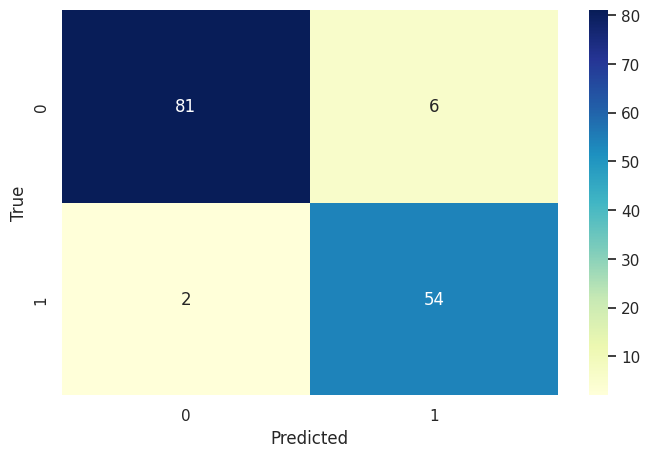

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        87
           1       0.90      0.96      0.93        56

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

Train accuracy score = 0.94
Test accuracy score = 0.94
Precision score = 0.9
Recall score = 0.96
F1 score = 0.93


In [ ]:
model_nb = GaussianNB()

model_nb.fit(features_train, labels_train)

predictNbTrain = model_nb.predict(features_train)
predictNbTest = model_nb.predict(features_test)

confusion_matNb = confusion_matrix(labels_test, predictNbTest)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matNb, annot=True,cmap="YlGnBu",
            xticklabels=np.unique(labels_test ),
            yticklabels=np.unique(labels_test ))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(labels_test, predictNbTest))
print('Train accuracy score = {0}'.format(round(accuracy_score(labels_train, predictNbTrain),2)))
print('Test accuracy score = {0}'.format(round(accuracy_score(labels_test, predictNbTest),2)))
print('Precision score = {0}'.format(round(precision_score(labels_test, predictNbTest),2)))
print('Recall score = {0}'.format(round(recall_score(labels_test, predictNbTest),2)))
print('F1 score = {0}'.format(round(f1_score(labels_test, predictNbTest),2)))

# 13. Stablo odluke

In [ ]:
from sklearn.tree import DecisionTreeClassifier

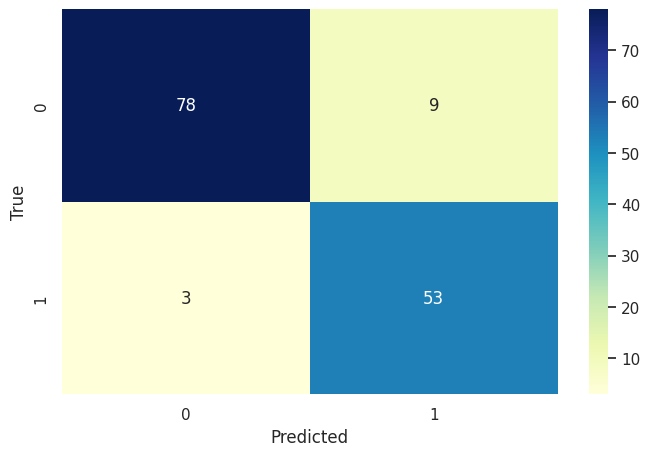

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        87
           1       0.85      0.95      0.90        56

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

Train accuracy score = 1.0
Test accuracy score = 0.92
Precision score = 0.85
Recall score = 0.95
F1 score = 0.9


In [ ]:
dtClf = DecisionTreeClassifier()

dtClf.fit(features_train, labels_train)

predictDtTrain = dtClf.predict(features_train)
predictDtTest = dtClf.predict(features_test)

confusion_matDt = confusion_matrix(labels_test, predictDtTest)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matDt, annot=True,cmap="YlGnBu",
            xticklabels=np.unique(labels_test ),
            yticklabels=np.unique(labels_test ))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(labels_test, predictDtTest))
print('Train accuracy score = {0}'.format(round(accuracy_score(labels_train, predictDtTrain),2)))
print('Test accuracy score = {0}'.format(round(accuracy_score(labels_test, predictDtTest),2)))
print('Precision score = {0}'.format(round(precision_score(labels_test, predictDtTest),2)))
print('Recall score = {0}'.format(round(recall_score(labels_test, predictDtTest),2)))
print('F1 score = {0}'.format(round(f1_score(labels_test, predictDtTest),2)))


# K najbližih susjeda (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

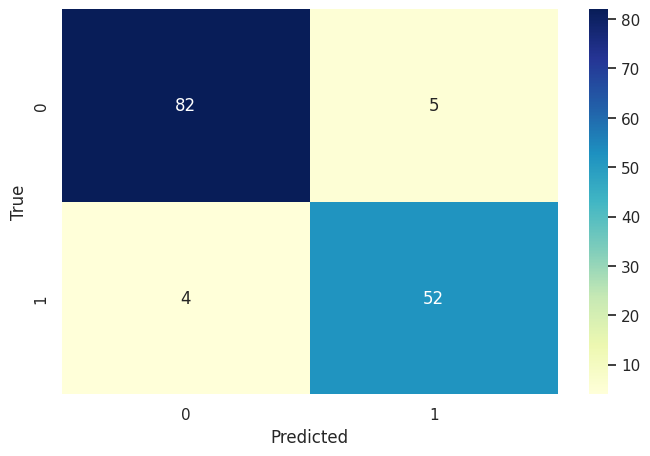

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        87
           1       0.91      0.93      0.92        56

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

Train accuracy score = 0.94
Test accuracy score = 0.94
Precision score = 0.91
Recall score = 0.93
F1 score = 0.92


In [ ]:
model_knn = KNeighborsClassifier()

model_knn.fit(features_train, labels_train)

predictKnnTrain = model_knn.predict(features_train)
predictKnnTest  = model_knn.predict(features_test)

confusion_matKnn = confusion_matrix(labels_test, predictKnnTest)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matKnn, annot=True,cmap="YlGnBu",
            xticklabels=np.unique(labels_test ),
            yticklabels=np.unique(labels_test ))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(labels_test, predictKnnTest))
print('Train accuracy score = {0}'.format(round(accuracy_score(labels_train, predictKnnTrain),2)))
print('Test accuracy score = {0}'.format(round(accuracy_score(labels_test, predictKnnTest),2)))
print('Precision score = {0}'.format(round(precision_score(labels_test, predictKnnTest),2)))
print('Recall score = {0}'.format(round(recall_score(labels_test, predictKnnTest),2)))
print('F1 score = {0}'.format(round(f1_score(labels_test, predictKnnTest),2)))